In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
IMG_SIZE = (28, 28)
CLASSES = ['add', 'sub', 'mul', 'div', 'eq']

data = []
labels = []

for label, category in enumerate(CLASSES):
    category_path = os.path.join('dataset', category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        # load
        with Image.open(img_path) as img:
            img = img.convert('RGB') # convert
            img = img.resize(IMG_SIZE) # resize
            img_array = np.array(img)
            data.append(img_array.flatten()) # flatten
            labels.append(label)

data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

Data shape: (3080, 2352)
Labels shape: (3080,)


In [6]:
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        # Reshape the flat array back to (height, width, channels)
        img = images[idx].reshape(IMG_SIZE[1], IMG_SIZE[0], 3)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Label: {CLASSES[labels[idx]]}")
        plt.axis('off')
    plt.show()

def plot_predictions(images, true_labels, pred_labels, num_samples):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        img = images[idx].reshape(IMG_SIZE[1], IMG_SIZE[0], 3)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"True: {CLASSES[true_labels[idx]]}\nPred: {CLASSES[pred_labels[idx]]}")
        plt.axis('off')
    plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

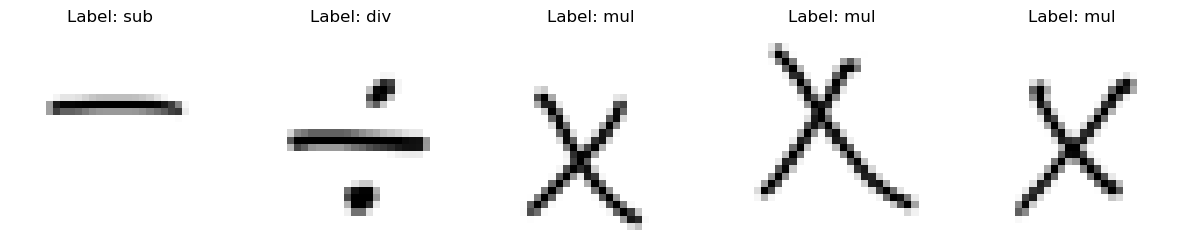

In [10]:
plot_sample_images(X_train, y_train)

In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=CLASSES))

Test Accuracy:  91.3961038961039
Classification Report:
              precision    recall  f1-score   support

         add       0.96      0.91      0.94       138
         sub       0.92      0.95      0.93       126
         mul       0.94      0.94      0.94       107
         div       0.90      0.85      0.87       131
          eq       0.85      0.92      0.89       114

    accuracy                           0.91       616
   macro avg       0.91      0.92      0.91       616
weighted avg       0.92      0.91      0.91       616



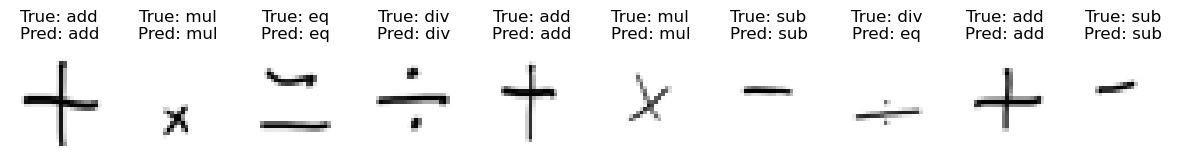

In [32]:
plot_predictions(X_test, y_test, y_pred, 10)

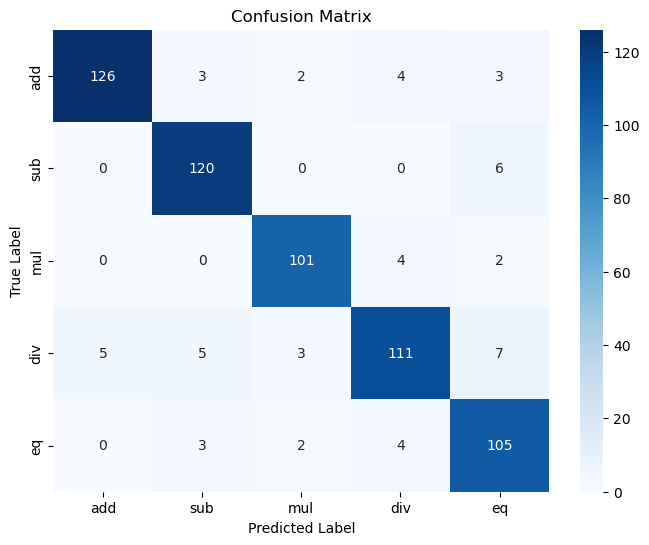

In [48]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=CLASSES, yticklabels=CLASSES)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()